In [18]:
from pandas import read_csv, to_datetime, DataFrame
import matplotlib.pyplot as plt

from scipy.stats import boxcox
import plotly.express as px 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss#,acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from numpy import  random, log,arange, log2, log10
import numpy as np
#from math import log

In [19]:
def plotting(title, data, x, y, x_label, y_label):
    """General function to plot the passenger data."""
    fig = px.line(data, x=data[x], y=data[y], labels={x: x_label, y: y_label})

    fig.update_layout(template="simple_white", font=dict(size=18),
                      title_text=title, width=650,
                      title_x=0.5, height=400)

    fig.show()

## Import du jeu de données 

In [20]:
seed = 42
random.seed(seed)
dfTime = read_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\Processed\Product families over time.csv")

<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
D:\WK\ydongue\AppData\Local\Temp\ipykernel_29740\3695154130.py:3: SyntaxWarning: invalid escape sequence '\A'
  dfTime = read_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\Processed\Product families over time.csv")


## transformation du jeu de données

In [21]:
df2 = dfTime.set_index('Product Family').T
df2.index = to_datetime(df2.index)

## Calcul de la saisonnalité, tendance et des résidus 

In [22]:
seasonal_data = {}
trend_data = {}
residual_data = {}
for family in df2.columns:
    # Décomposer la série temporelle pour extraire la saisonnalité
    decomposition = seasonal_decompose(df2[family], model='additive')  # Période de 3 mois
    
    # Stocker la saisonnalité
    seasonal_data[family] = decomposition.seasonal
    trend_data[family] = decomposition.trend
    residual_data[family] = decomposition.resid
    # Optionnel : tracer la saisonnalité
    #decomposition.trend.plot(title=f'Tendance of {family}')
    #plt.show()

## Test de  A dickey - fuller pour la stationnarité des séries temp.

In [23]:
adf_results = {}

for family in df2.columns:
    # Appliquer le test ADF
    result = adfuller(df2[family].dropna())
    
    # Stocker les résultats
    adf_results[family] = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }


## Test de KPSS pour la stationnarité des séries temp.

In [24]:

kpss_results = {}

for family in df2.columns:
    # Appliquer le test ADF
    result = kpss(df2[family])
    
    # Stocker les résultats
    kpss_results[family] = {
        'KPSS Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[2]
    }


D:\WK\ydongue\AppData\Local\Temp\ipykernel_29740\3470438521.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df2[family])
D:\WK\ydongue\AppData\Local\Temp\ipykernel_29740\3470438521.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df2[family])
D:\WK\ydongue\AppData\Local\Temp\ipykernel_29740\3470438521.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df2[family])
D:\WK\ydongue\AppData\Local\Temp\ipykernel_29740\3470438521.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the 

## Vérification de la stationnarité avec Dickey-Fuller augmenté ADF

In [25]:
for family in df2.columns:
    p_val = adf_results[family]['p-value']
    if p_val > 0.05 : 
        print("L'hypothèse H0 est rejeté pour la famille {0}, elle n'est donc pas stationnaire au sens de DF avec une p-value de {1}".format(family,p_val))
           

L'hypothèse H0 est rejeté pour la famille A, elle n'est donc pas stationnaire au sens de DF avec une p-value de 0.12496179764062298
L'hypothèse H0 est rejeté pour la famille F, elle n'est donc pas stationnaire au sens de DF avec une p-value de 0.2813989053572697
L'hypothèse H0 est rejeté pour la famille H, elle n'est donc pas stationnaire au sens de DF avec une p-value de 0.9752771515824579
L'hypothèse H0 est rejeté pour la famille K, elle n'est donc pas stationnaire au sens de DF avec une p-value de 0.9564539610978248
L'hypothèse H0 est rejeté pour la famille M, elle n'est donc pas stationnaire au sens de DF avec une p-value de 0.9928901029146944
L'hypothèse H0 est rejeté pour la famille N, elle n'est donc pas stationnaire au sens de DF avec une p-value de 0.9989638998432608
L'hypothèse H0 est rejeté pour la famille O, elle n'est donc pas stationnaire au sens de DF avec une p-value de 1.0
L'hypothèse H0 est rejeté pour la famille P, elle n'est donc pas stationnaire au sens de DF avec 

## Vérification de la stationnarité avec Kwiatkowski-Phillips-Schmidt-Shin KPSS

## test acf et pacf

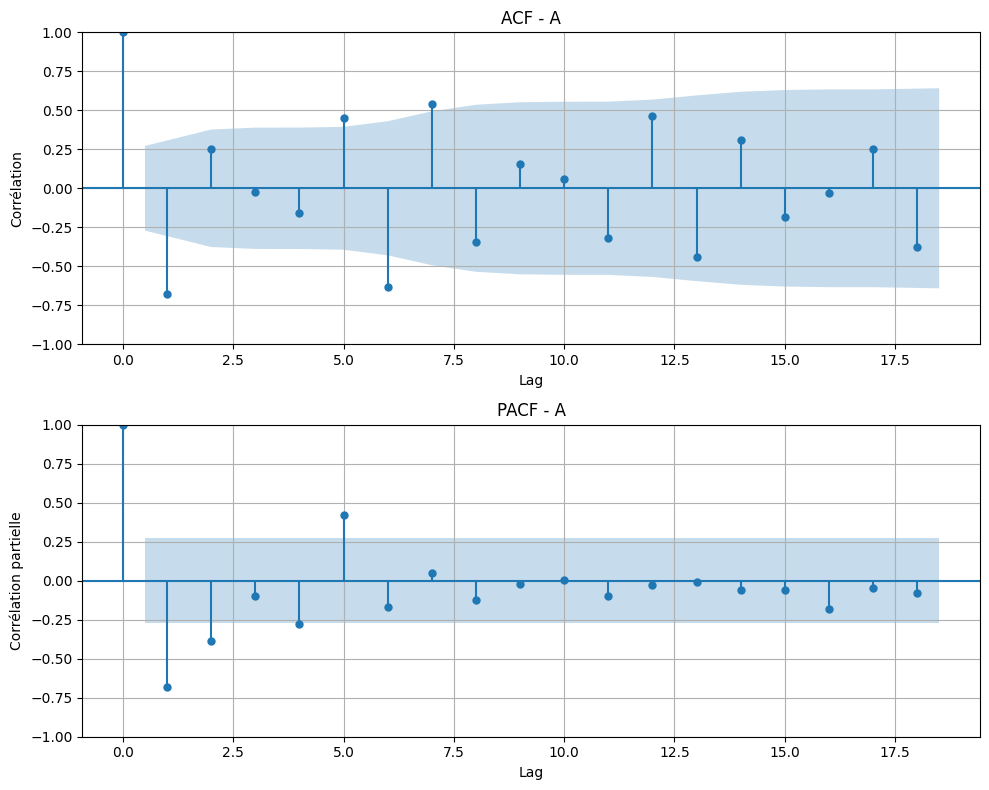

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
diff_series = df2['A'].diff(periods=1).dropna()
# Tracer l'ACF
plot_acf(diff_series, zero=True, ax=ax1)
ax1.set_title('ACF - A')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
#ax1.set_xticks(arange(0, 11, 1))

# Tracer le PACF
plot_pacf(diff_series,  zero=True, ax=ax2)
ax2.set_title('PACF - A')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
#ax2.set_xticks(arange(0, 11, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

In [27]:
def determine_petit_truc(series):
    min_positive_value = series[series > 0].min()
    val = 0.1 #0.00001
    return min_positive_value * val


In [28]:

fams = ["A","N","O"]
#petit_truc = 0.0001
for family in fams:
    petit_truc = determine_petit_truc(df2[family])
    print(petit_truc)
    diff_series1 = log(df2[family] + petit_truc)
    diff_log_series = diff_series1.diff().dropna()
    result2 = adfuller(diff_log_series.dropna())  

    adfuller_results2 = {
    'adf Statistic': result2[0],
    'p-value': result2[1],
    'Critical Values': result2[4]
    }
    p_val = adfuller_results2['p-value']
    print("La famille {0} a une stationnarité avec une p-valeur de {1} ".format(family,p_val))


13399.6
La famille A a une stationnarité avec une p-valeur de 0.033991538386127736 
0.2
La famille N a une stationnarité avec une p-valeur de 0.14408902524090617 
3240.0
La famille O a une stationnarité avec une p-valeur de 0.009390847192167161 


## On va tester une autre méthode 

## Code pour afficher quelques familles de produit

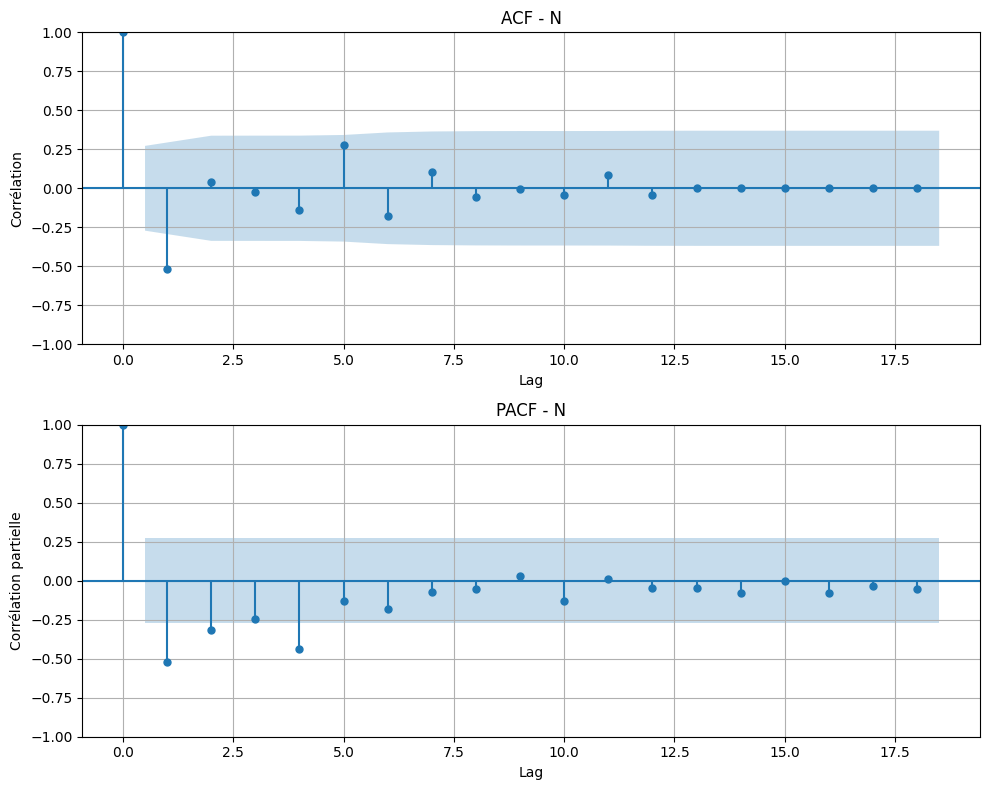

In [29]:
seasonal_data = {}
trend_data = {}
residual_data = {}
family1 = "N"
petit_truc = determine_petit_truc(df2[family1])
diff_series1 = log(df2[family1] + petit_truc)
diff_log_series = diff_series1.diff().dropna()

diff_log_series = df2[family1].diff().dropna() 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(diff_log_series, zero=True, ax=ax1)
ax1.set_title('ACF - N')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
#ax1.set_xticks(arange(0, 11, 1))

# Tracer le PACF
plot_pacf(diff_log_series,  zero=True, ax=ax2)
ax2.set_title('PACF - N')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
#ax2.set_xticks(arange(0, 11, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

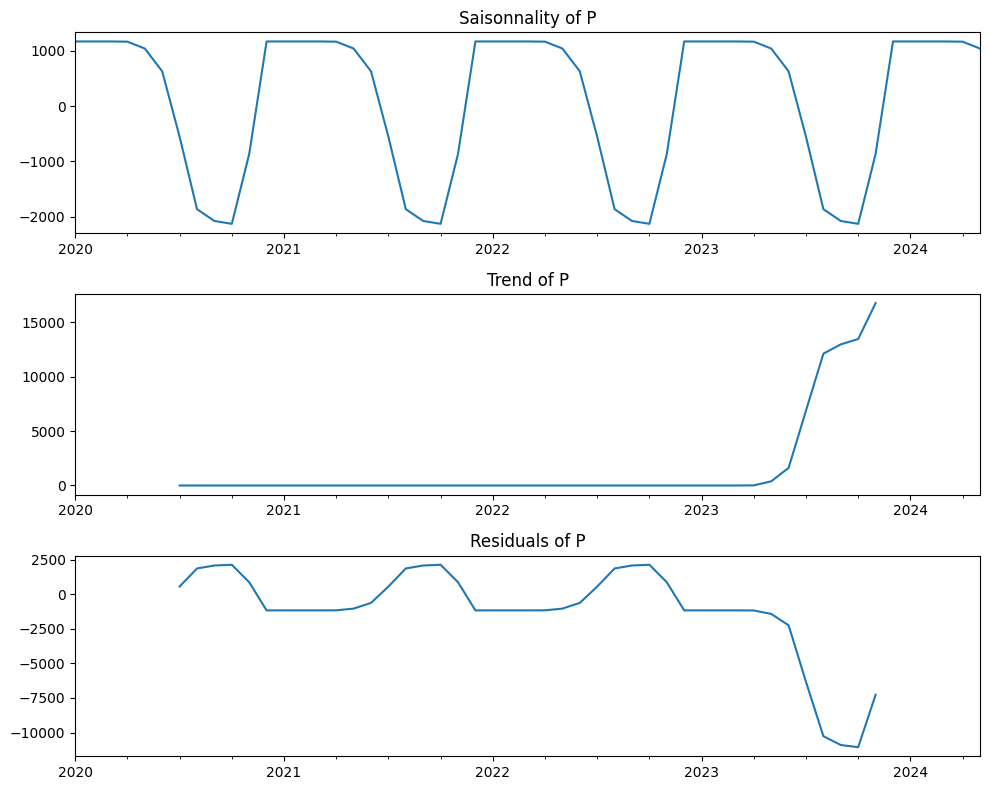

In [30]:
fams = ["P"]
seasonal_data = {}
trend_data = {}
residual_data = {}
for family in fams:
    decomposition = seasonal_decompose(df2[family], model='additive')  # Période de 3 mois
    
    # Stocker la saisonnalité
    seasonal_data[family] = decomposition.seasonal
    trend_data[family] = decomposition.trend
    residual_data[family] = decomposition.resid

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

    # Optionnel : tracer la tendance
    #plt.subplot(1,1,3)
    decomposition.seasonal.plot(ax=ax1)
    ax1.set_title(f'Saisonnality of {family}')
    #plt.subplot(1,2,3)
    decomposition.trend.plot(ax=ax2)
    ax2.set_title(f'Trend of {family}')
    #plt.subplot(1,3,3)
    decomposition.resid.plot(ax=ax3)
    ax3.set_title(f'Residuals of {family}')
    plt.tight_layout()
    plt.show()

In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


# Liste des familles de séries temporelles

def determine_petit_truc(series):
    min_positive_value = series[series > 0].min()
    val = 0.00001
    return min_positive_value * val

# Fonction pour tester la stationnarité avec le test ADF
def test_stationarity(series):
    result = adfuller(series.dropna())
    return result[1]  # Retourne la p-value

# Fonction pour appliquer la transformation logarithmique
def apply_log(series, p):
    return np.log(series + p)

# Initialiser un DataFrame pour enregistrer les résultats
results_df = pd.DataFrame(columns=["family", "ordreP", "loga"])
fams = df2.columns

results_list = []
stat_data = []
# Traiter chaque famille de séries temporelles
for family in fams:
    print(f"\nTraitement de la famille: {family}")
    
    series = df2[family].dropna()
    p_val = test_stationarity(series)
    ordreP = 0
    loga = 0
    petit_truc = determine_petit_truc(df2[family])
    # Tester la stationnarité de la série originale
    
    if p_val > 0.05:
        # Appliquer des différentiations successives
        for p in range(1, 6):
            diff_series = series.diff(periods=p).dropna()
            p_val = test_stationarity(diff_series)
            if p_val <= 0.05:
                ordreP = p
                break
        
        # Si toujours non stationnaire après différentiation
        if p_val > 0.05:
            # Appliquer une transformation logarithmique
            log_series = apply_log(series, p=petit_truc)
            loga = 1
            
            # Tester la stationnarité de la série log-transformée
            p_val = test_stationarity(log_series)
            if p_val > 0.05:
                # Appliquer des différentiations successives sur la série log-transformée
                for p in range(1, 6):
                    diff_log_series = log_series.diff(periods=p).dropna()
                    p_val = test_stationarity(diff_log_series)
                    if p_val <= 0.05:
                        ordreP = p
                        break
    
    # Enregistrer les résultats dans le DataFrame
    results_list.append({"family": family, "ordreP": ordreP, "loga": loga})

# Convertir la liste de résultats en DataFrame
results_df = DataFrame(results_list)

# Afficher les résultats
print("\nRésultats finaux:")
print(results_df)

# Enregistrer les résultats dans un fichier Excel (optionnel)
#results_df.to_excel("stationarity_results.xlsx", index=False)



Traitement de la famille: A

Traitement de la famille: B

Traitement de la famille: C

Traitement de la famille: D

Traitement de la famille: E

Traitement de la famille: F

Traitement de la famille: G

Traitement de la famille: H

Traitement de la famille: I

Traitement de la famille: J

Traitement de la famille: K

Traitement de la famille: L

Traitement de la famille: M

Traitement de la famille: N

Traitement de la famille: O

Traitement de la famille: P

Traitement de la famille: Q

Résultats finaux:
   family  ordreP  loga
0       A       3     0
1       B       0     0
2       C       0     0
3       D       0     0
4       E       0     0
5       F       1     0
6       G       0     0
7       H       1     0
8       I       0     0
9       J       0     0
10      K       1     0
11      L       0     0
12      M       1     0
13      N       2     1
14      O       1     1
15      P       1     1
16      Q       0     0


In [32]:
results_df.to_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\For_Modeling\stationnarity_steps.csv",index=False)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
D:\WK\ydongue\AppData\Local\Temp\ipykernel_29740\3907808382.py:1: SyntaxWarning: invalid escape sequence '\A'
  results_df.to_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\For_Modeling\stationnarity_steps.csv",index=False)


In [33]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


# Liste des familles de séries temporelles

def determine_petit_truc(series):
    min_positive_value = series[series > 0].min()
    val = 0.00001
    return min_positive_value * val

# Fonction pour tester la stationnarité avec le test ADF
def test_stationarity(series):
    result = adfuller(series.dropna())
    return result[1]  # Retourne la p-value

# Fonction pour appliquer la transformation logarithmique
def apply_log(series, p):
    return np.log(series + p)

# Initialiser un DataFrame pour enregistrer les résultats
results_df = pd.DataFrame(columns=["family", "ordreP", "loga"])
fams = df2.columns

results_list = []
stat_data = dict()
# Traiter chaque famille de séries temporelles
for family in fams:
    print(f"\nTraitement de la famille: {family}")
    
    series = df2[family].dropna()
    p_val = test_stationarity(series)
    ordreP = 0
    loga = 0
    petit_truc = determine_petit_truc(df2[family])
    if p_val < 0.05:
        stat_data[family] = series
    # Tester la stationnarité de la série originale
    
    if p_val > 0.05:
        # Appliquer des différentiations successives
        for p in range(1, 6):
            diff_series = series.diff(periods=p).dropna()
            p_val = test_stationarity(diff_series)
            if p_val <= 0.05:
                ordreP = p
                stat_data[family] = diff_series
                break
        
        # Si toujours non stationnaire après différentiation
        if p_val > 0.05:
            # Appliquer une transformation logarithmique
            log_series = apply_log(series, p=petit_truc)
            loga = 1
            
            # Tester la stationnarité de la série log-transformée
            p_val = test_stationarity(log_series)
            if p_val > 0.05:
                # Appliquer des différentiations successives sur la série log-transformée
                for p in range(1, 6):
                    diff_log_series = log_series.diff(periods=p).dropna()
                    p_val = test_stationarity(diff_log_series)
                    if p_val <= 0.05:
                        ordreP = p
                        stat_data[family] = diff_log_series
                        break
    
    # Enregistrer les résultats dans le DataFrame
    #results_list.append({"family": family, "ordreP": ordreP, "loga": loga})

# Convertir la liste de résultats en DataFrame
#results_df = DataFrame(results_list)
stat_data = DataFrame(stat_data)
# Afficher les résultats
print("\nRésultats finaux:")
#print(stat_data)

# Enregistrer les résultats dans un fichier Excel (optionnel)
#results_df.to_excel("stationarity_results.xlsx", index=False)



Traitement de la famille: A

Traitement de la famille: B

Traitement de la famille: C

Traitement de la famille: D

Traitement de la famille: E

Traitement de la famille: F

Traitement de la famille: G

Traitement de la famille: H

Traitement de la famille: I

Traitement de la famille: J

Traitement de la famille: K

Traitement de la famille: L

Traitement de la famille: M

Traitement de la famille: N

Traitement de la famille: O

Traitement de la famille: P

Traitement de la famille: Q

Résultats finaux:


In [34]:
stat_data.to_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\For_Modeling\stationnarity_data.csv",index=True)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
D:\WK\ydongue\AppData\Local\Temp\ipykernel_29740\2541367442.py:1: SyntaxWarning: invalid escape sequence '\A'
  stat_data.to_csv("D:\Alternance_2023_UTT\MS EBDE UTT 23 Prof thesis\Sample_Data\For_Modeling\stationnarity_data.csv",index=True)
